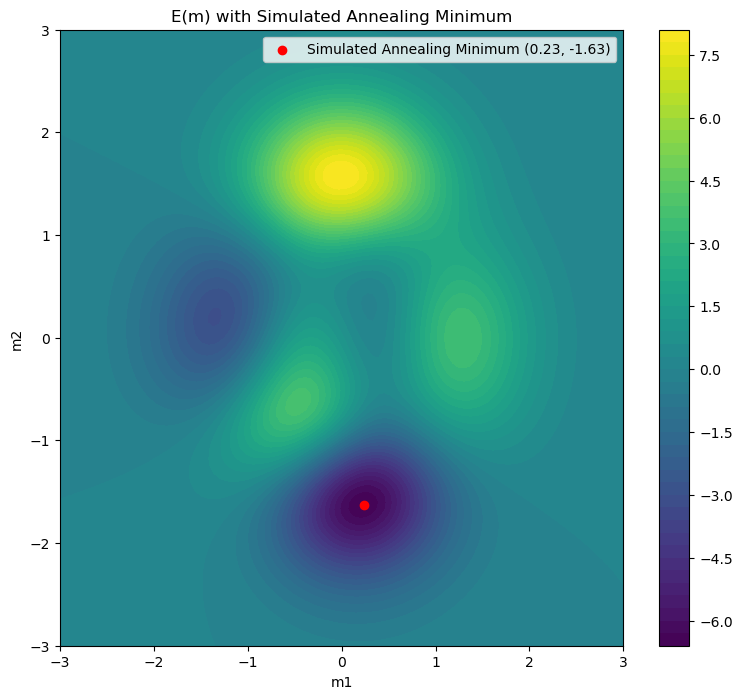

The minimum from Simulated Annealing search is at m1 = 0.2341, m2 = -1.6252 with a value of -6.5508


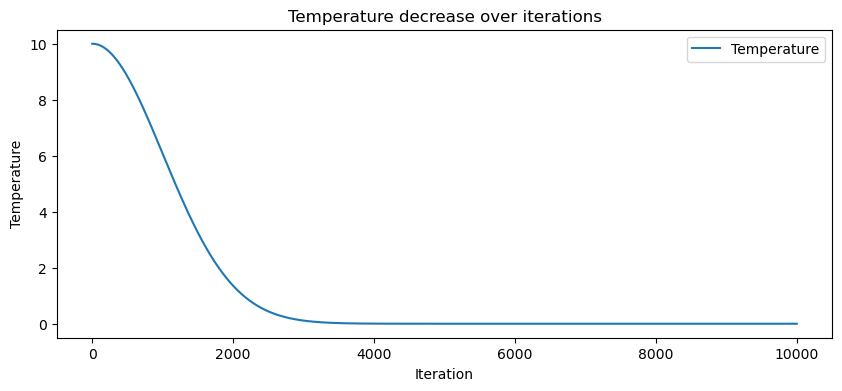

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# Define the function to optimize
def fun(m1, m2):
    return (3 * (1 - m1)**2 * np.exp(-(m1**2) - (m2 + 1)**2) -
            10 * (m1 / 5 - m1**3 - m2**5) * np.exp(-m1**2 - m2**2) -
            1/3 * np.exp(-(m1 + 1)**2 - m2**2))

# Set parameters for the Simulated Annealing optimization
Niter = 10000  # Number of iterations
temp = 10.0  # Initial temperature
cooling_rate = 0.01  # Cooling rate
m1_min, m1_max = -3, 3
m2_min, m2_max = -3, 3

# Initial guess and corresponding function value
mg = np.array([np.random.uniform(m1_min, m1_max), np.random.uniform(m2_min, m2_max)])
Eg = fun(mg[0], mg[1])

# Store temperature values for plotting
temp_values = []

# Simulated Annealing search for the minimum
for i in range(Niter):
    temp_values.append(temp)
    # Random new position near current position
    ma = mg + np.random.uniform(-1, 1, 2) * temp
    # Apply periodic boundary conditions
    ma = np.clip(ma, [m1_min, m2_min], [m1_max, m2_max])
    Ea = fun(ma[0], ma[1])
    
    # Probability to accept if Ea is greater than Eg
    p_accept = np.exp(-(Ea - Eg) / temp)
    
    # Adopt the new parameters if Ea is lower than Eg or if random < p_accept
    if Ea < Eg or np.random.rand() < p_accept:
        mg = ma
        Eg = Ea
    
    # Exponential decrease of temperature
    temp = temp * np.exp(-cooling_rate * i / Niter)

# Plotting the function with the found minimum
m1 = np.linspace(m1_min, m1_max, 100)
m2 = np.linspace(m2_min, m2_max, 100)
M1, M2 = np.meshgrid(m1, m2)
Z = fun(M1, M2)
plt.figure(figsize=(20, 8))

# Function plot
plt.subplot(1, 2, 1)
contour = plt.contourf(M1, M2, Z, levels=50, cmap='viridis')
plt.colorbar(contour)
plt.scatter(mg[0], mg[1], color='red', marker='o', label=f'Simulated Annealing Minimum ({mg[0]:.2f}, {mg[1]:.2f})')
plt.legend()
plt.title('E(m) with Simulated Annealing Minimum')
plt.xlabel('m1')
plt.ylabel('m2')
plt.show()

# Print the minimum location and value from Simulated Annealing search
print(f'The minimum from Simulated Annealing search is at m1 = {mg[0]:.4f}, m2 = {mg[1]:.4f} with a value of {Eg:.4f}')

# Plotting the temperature decrease
plt.figure(figsize=(10, 4))
plt.plot(temp_values, label='Temperature')
plt.title('Temperature decrease over iterations')
plt.xlabel('Iteration')
plt.ylabel('Temperature')
plt.legend()
plt.show()
